Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

In [55]:
#Importación de librerías necesarias:
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import datetime
import matplotlib.pyplot as plt

In [56]:
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=365&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
#APIresp.text

True
200
0:00:00.660123


In [57]:
# 2.- Crear un dataFrame de los últimos 365 días
x = ast.literal_eval(APIresp.text)

#Crear nueva columna con la longitud de la descripcion
import pandas as pd
df = pd.DataFrame(x)

df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df.rename( columns={4 :'Close price'}, inplace=True)
df.rename( columns={6 :'Fecha'}, inplace=True)
df['Nueva Fecha'] = df["Fecha"]//1000
df = df.drop(df.columns[[1]], axis='columns')
df

,Close price,Nueva Fecha
0,36958.32000000,1643155199
1,36809.34000000,1643241599
2,37160.10000000,1643327999
3,37716.56000000,1643414399
4,38166.84000000,1643500799
...,...,...
360,22667.21000000,1674259199
361,22783.55000000,1674345599
362,22707.88000000,1674431999
363,22916.45000000,1674518399


In [58]:
df.dtypes

Close price    object
Nueva Fecha     int64
dtype: object

In [44]:
# Debo convertir antes al formato datetime para que lo reconozca como índice timestamp
df['Nueva Fecha'] = pd.to_datetime(df['Nueva Fecha'])
df

,Close price,Nueva Fecha,Nueva_Fecha
0,36958.32000000,1970-01-01 00:00:01.643155199,1970-01-01 00:00:01.643155199
1,36809.34000000,1970-01-01 00:00:01.643241599,1970-01-01 00:00:01.643241599
2,37160.10000000,1970-01-01 00:00:01.643327999,1970-01-01 00:00:01.643327999
3,37716.56000000,1970-01-01 00:00:01.643414399,1970-01-01 00:00:01.643414399
4,38166.84000000,1970-01-01 00:00:01.643500799,1970-01-01 00:00:01.643500799
...,...,...,...
360,22667.21000000,1970-01-01 00:00:01.674259199,1970-01-01 00:00:01.674259199
361,22783.55000000,1970-01-01 00:00:01.674345599,1970-01-01 00:00:01.674345599
362,22707.88000000,1970-01-01 00:00:01.674431999,1970-01-01 00:00:01.674431999
363,22916.45000000,1970-01-01 00:00:01.674518399,1970-01-01 00:00:01.674518399


In [45]:
df = df.drop(df.columns[[1]], axis='columns')
df

,Close price,Nueva_Fecha
0,36958.32000000,1970-01-01 00:00:01.643155199
1,36809.34000000,1970-01-01 00:00:01.643241599
2,37160.10000000,1970-01-01 00:00:01.643327999
3,37716.56000000,1970-01-01 00:00:01.643414399
4,38166.84000000,1970-01-01 00:00:01.643500799
...,...,...
360,22667.21000000,1970-01-01 00:00:01.674259199
361,22783.55000000,1970-01-01 00:00:01.674345599
362,22707.88000000,1970-01-01 00:00:01.674431999
363,22916.45000000,1970-01-01 00:00:01.674518399


In [46]:
df["Price"] = df["Close price"].astype('float')
df

,Close price,Nueva_Fecha,Price
0,36958.32000000,1970-01-01 00:00:01.643155199,36958.32
1,36809.34000000,1970-01-01 00:00:01.643241599,36809.34
2,37160.10000000,1970-01-01 00:00:01.643327999,37160.10
3,37716.56000000,1970-01-01 00:00:01.643414399,37716.56
4,38166.84000000,1970-01-01 00:00:01.643500799,38166.84
...,...,...,...
360,22667.21000000,1970-01-01 00:00:01.674259199,22667.21
361,22783.55000000,1970-01-01 00:00:01.674345599,22783.55
362,22707.88000000,1970-01-01 00:00:01.674431999,22707.88
363,22916.45000000,1970-01-01 00:00:01.674518399,22916.45


<function matplotlib.pyplot.show(close=None, block=None)>

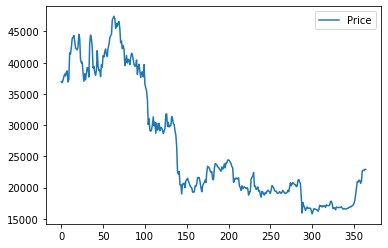

In [47]:
df.plot(kind='line', y='Price')
plt.show



In [48]:
#Convertir 'Nueva Fecha' a formato fecha
df['Fecha Convertida'] = df['Nueva Fecha']

KeyError: 'Nueva Fecha'